In [1]:
!nvidia-smi

Mon Mar 25 23:37:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.07             Driver Version: 535.161.07   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090 Ti     Off | 00000000:01:00.0 Off |                  Off |
|  0%   52C    P8              28W / 450W |    282MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install git+https://github.com/DLR-RM/rl-baselines3-zoo@update/hf

  Cloning https://github.com/DLR-RM/rl-baselines3-zoo (to revision update/hf) to /tmp/pip-req-build-jcve_dtz
  Running command git clone --filter=blob:none --quiet https://github.com/DLR-RM/rl-baselines3-zoo /tmp/pip-req-build-jcve_dtz
  Running command git checkout -b update/hf --track origin/update/hf
  Switched to a new branch 'update/hf'
  Branch 'update/hf' set up to track remote branch 'update/hf' from 'origin'.
  Resolved https://github.com/DLR-RM/rl-baselines3-zoo to commit 7dcbff7e74e7a12c052452181ff353a4dbed313a
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-1

In [3]:
!pip install rl_zoo3==2.0.0a9

In [ ]:
!sudo apt-get install swig cmake ffmpeg 

In [4]:
!pip install gymnasium[atari]
!pip install gymnasium[accept-rom-license]

In [5]:
%%capture
!apt install python-opengl
!apt install xvfb
!pip3 install pyvirtualdisplay

In [6]:
!pwd

/home/dslab/code/Hn


In [12]:
!touch dqn.yml

In [7]:
#Train
!python -m rl_zoo3.train --algo dqn --env SpaceInvadersNoFrameskip-v4 -f logs/ -c dqn.yml


2024-03-25 23:41:35.580426: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 23:41:35.605552: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 23:41:36.003414: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
========== SpaceInvadersNoFrameskip-v4 ==========
Seed: 3737694374
Loading hyperparameters from: dqn.yml
Default hyperparameters for environment (ones being tuned will be overridden):
OrderedDict([('batch_size', 64),
             ('buffer_size', 100000),
      

In [8]:
#Evaluate
!python -m rl_zoo3.enjoy --algo dqn --env SpaceInvadersNoFrameskip-v4 --no-render --n-timesteps 5000 --folder logs/

2024-03-26 00:06:57.386909: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-26 00:06:57.411683: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-26 00:06:57.797194: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading latest experiment, id=3
Loading logs/dqn/SpaceInvadersNoFrameskip-v4_3/SpaceInvadersNoFrameskip-v4.zip
A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
Stacking 4 frames
Atari Episode Score: 535.00
Atari Episode Length 3520

In [24]:
from huggingface_hub import notebook_login # To log to our Hugging Face account to be able to upload models to the Hub.
notebook_login()
#!git config --global credential.helper store

In [9]:
!python -m rl_zoo3.push_to_hub  --algo dqn  --env SpaceInvadersNoFrameskip-v4  --repo-name dqn-SpaceInvadersNoFrameskip_V4  -orga lisagrace  -f logs/

2024-03-26 00:07:24.635303: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-26 00:07:24.660077: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-26 00:07:25.050796: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading latest experiment, id=3
Loading logs/dqn/SpaceInvadersNoFrameskip-v4_3/SpaceInvadersNoFrameskip-v4.zip
A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
Stacking 4 frames
Wrapping the env in a VecTransposeImage.
Uploading to

In [13]:
!pip install tensorflow[and-cuda]

  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.3 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.7-py2.py3-none-any.whl.metadata (849 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-

In [ ]:
#Load the model from the hub
!python -m rl_zoo3.load_from_hub --algo dqn --env BeamRiderNoFrameskip-v4 -orga sb3 -f rl_trained/

In [ ]:
#Eval
!python -m rl_zoo3.enjoy --algo dqn --env BeamRiderNoFrameskip-v4 -n 5000  -f rl_trained/ --no-render

Model link on Hugging Face: [Link](https://huggingface.co/lisagrace/dqn-SpaceInvadersNoFrameskip_V4)

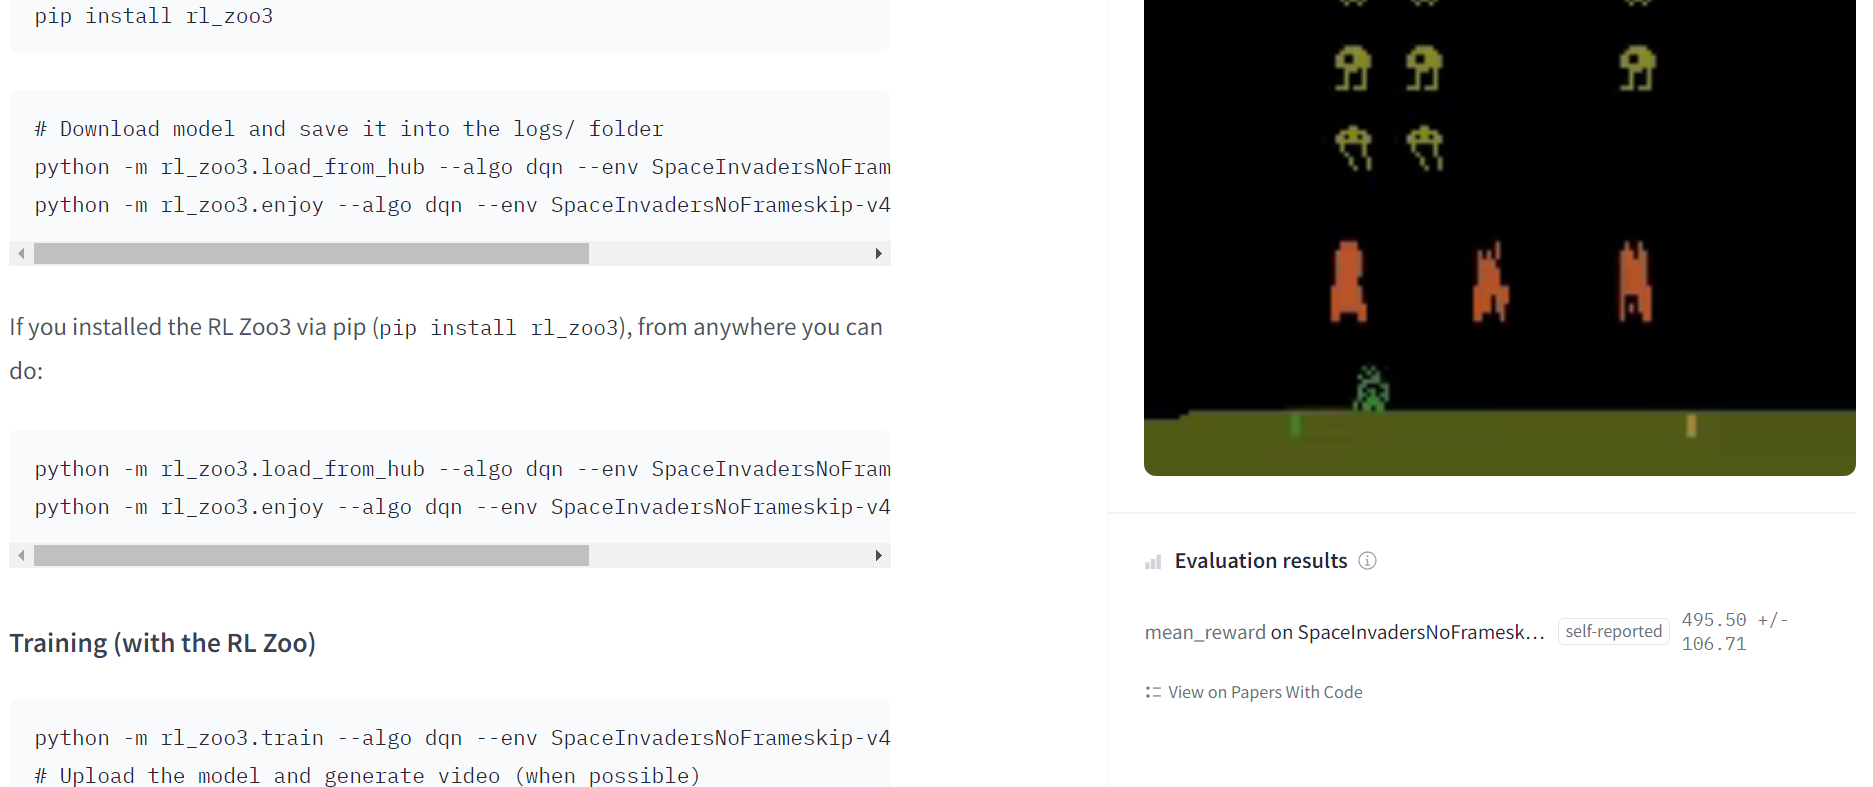

In [ ]:
#Config
'''
SpaceInvadersNoFrameskip-v4:
  env_wrapper:
    - stable_baselines3.common.atari_wrappers.AtariWrapper
  frame_stack: 4
  policy: 'CnnPolicy'
  n_timesteps: 1000000
  buffer_size: 100000
  learning_rate: 3.86e-05
  batch_size: 64
  learning_starts: 100000
  target_update_interval: 1000
  train_freq: 4
  gradient_steps: 1
  exploration_fraction: 0.1
  exploration_final_eps: 0.01
  # If True, you need to deactivate handle_timeout_termination
  # in the replay_buffer_kwargs
  optimize_memory_usage: False
'''